In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv('1.04.+Real-life+example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv=data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='Price', ylabel='Count'>

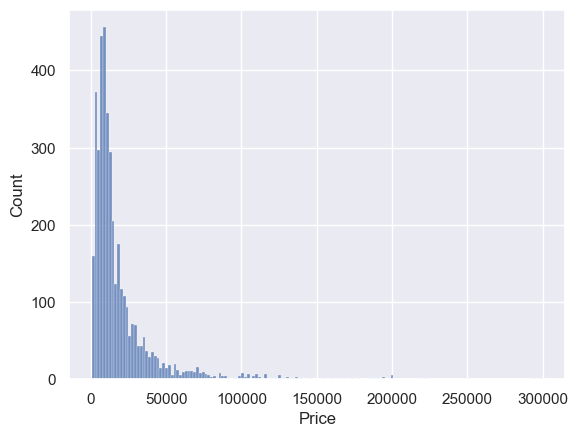

In [7]:
sns.histplot(data_no_mv['Price'])

In [8]:
q=data_no_mv['Price'].quantile(0.99)
data1=data_no_mv[data_no_mv['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Ivy Sarkar\AppData\Local\Temp\ipykernel_17236\771842081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

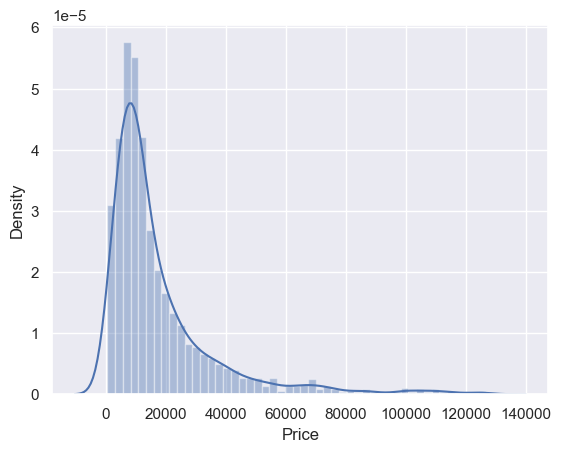

In [9]:
sns.distplot(data1['Price'])

C:\Users\Ivy Sarkar\AppData\Local\Temp\ipykernel_17236\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

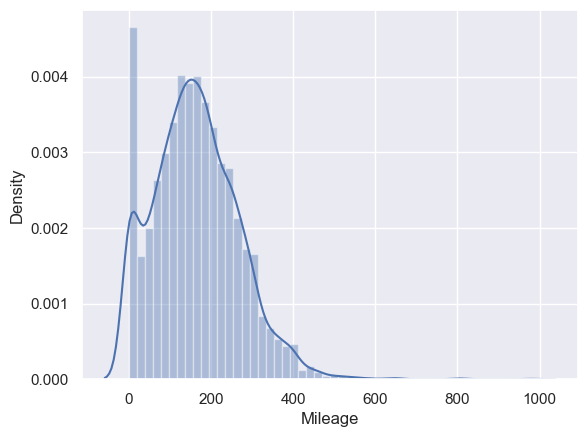

In [10]:
sns.distplot(data_no_mv['Mileage'])

C:\Users\Ivy Sarkar\AppData\Local\Temp\ipykernel_17236\1237381239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

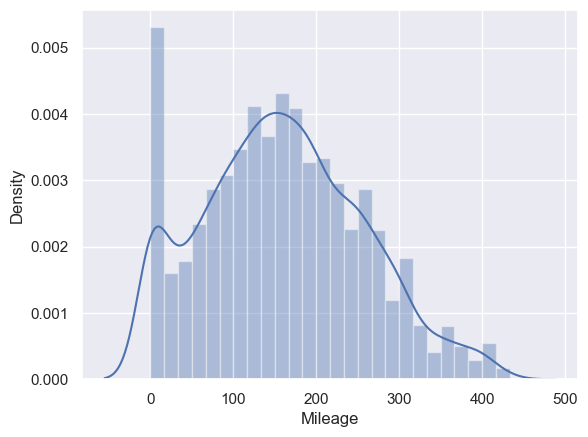

In [11]:
q=data_no_mv['Mileage'].quantile(0.99)
data2=data_no_mv[data_no_mv['Mileage']<q]
data2.describe(include='all')
sns.distplot(data2['Mileage'])

<Axes: xlabel='EngineV', ylabel='Count'>

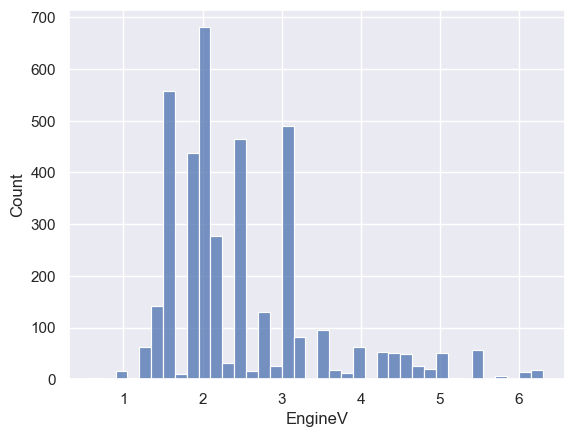

In [12]:
data3=data2[data2['EngineV']<6.5]
sns.histplot(data3['EngineV'])

<Axes: xlabel='Year', ylabel='Count'>

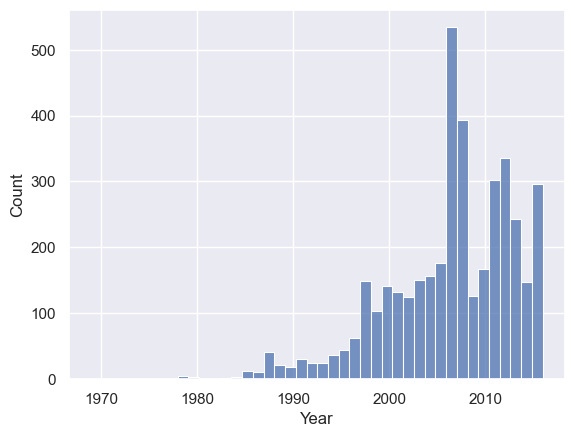

In [13]:
sns.histplot(data_no_mv['Year'])

C:\Users\Ivy Sarkar\AppData\Local\Temp\ipykernel_17236\3687976381.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

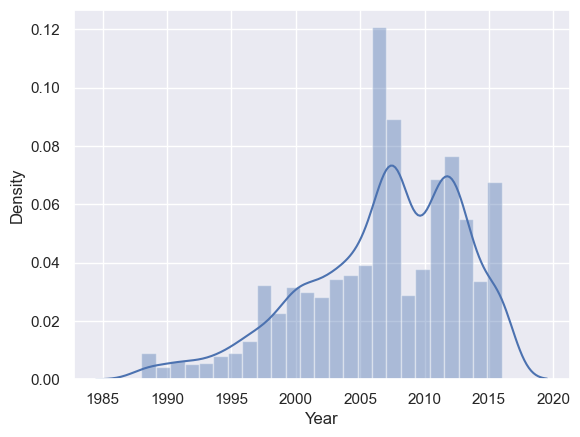

In [14]:
q=data3['Year'].quantile(0.01)
data4=data3[data3['Year']>q]

sns.distplot(data4['Year'])

In [15]:
data_cleaned=data4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Text(0.5, 1.0, 'Price and Mileage')

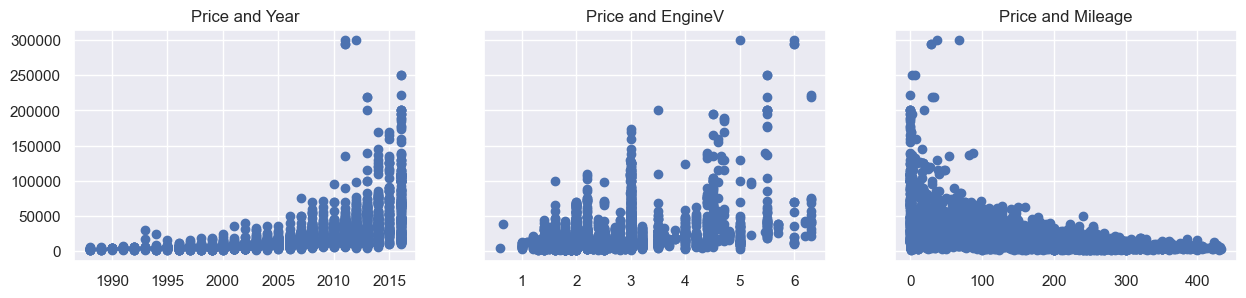

In [16]:
##Checking OLS assumptions
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

In [17]:
##Relaxing the assumptions
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


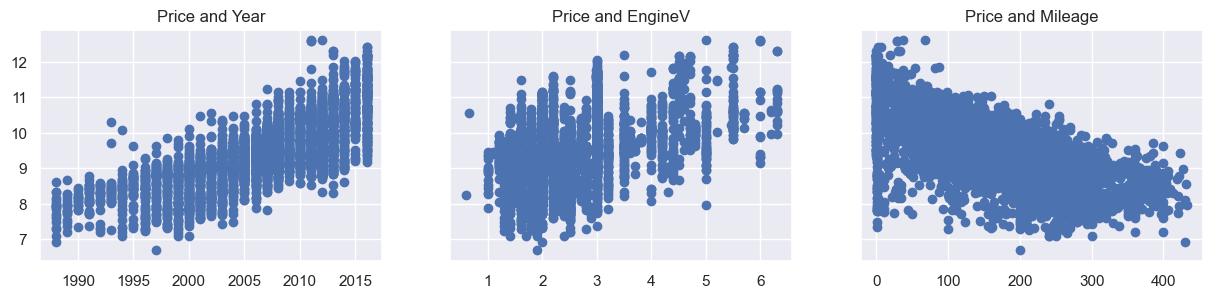

In [18]:
##Checking OLS assumptions
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')
plt.show()

In [19]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns
vif

,VIF,features
0,3.703266,Mileage
1,10.323287,Year
2,7.400348,EngineV


In [21]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


In [22]:
data_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.0,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.0,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.0,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [23]:
data_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [24]:
cols = ['log_price','Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [25]:
data_preprocesses=data_dummies[cols]
data_preprocesses.head()

,log_price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,4200.0,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,7900.0,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,13300.0,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,23000.0,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,18300.0,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [26]:
targets=data_preprocesses['log_price']
input=data_preprocesses.drop(['log_price'],axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(input)
input_scaled=scaler.transform(input)

In [28]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(input_scaled,targets,test_size= 0.2,random_state=365)

In [29]:
reg=LinearRegression()
reg.fit(x_train,y_train) 

LinearRegression()

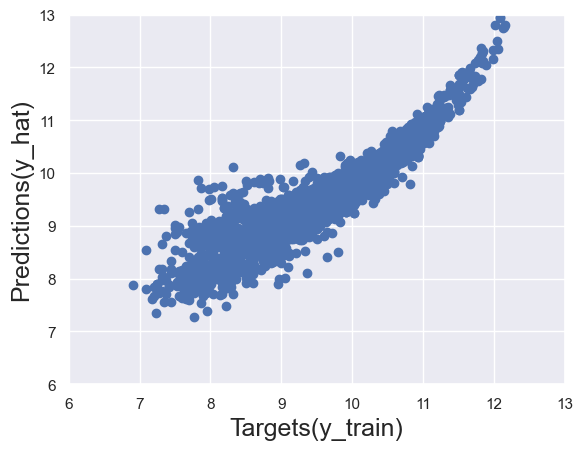

In [30]:
y_hat=reg.predict(x_train)
##do a scatter plot
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=18)
plt.ylabel('Predictions(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Ivy Sarkar\AppData\Local\Temp\ipykernel_17236\1203112586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat)


Text(0.5, 1.0, 'residuals')

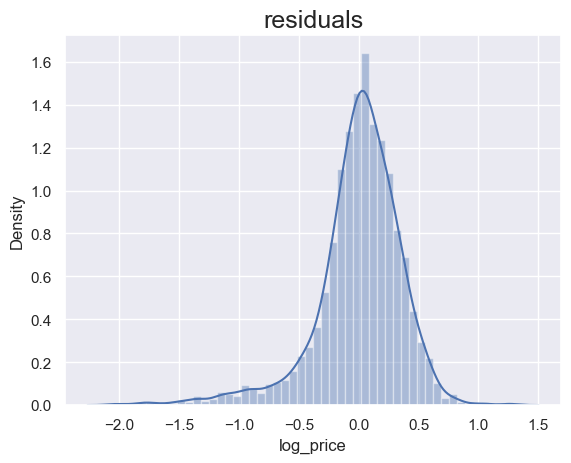

In [31]:
sns.distplot(y_train-y_hat)
plt.title('residuals',size=18)

In [32]:
reg.score(x_train,y_train)

0.8428830966081586

In [33]:
##bias
reg.intercept_

9.437505454288988

In [34]:
##weights
reg.coef_

array([ 0.3887111 , -0.29528314,  0.11935128,  0.01434711, -0.0100464 ,
       -0.09102691, -0.13537127, -0.02029752, -0.05885584, -0.11084386,
       -0.06730939, -0.13476019, -0.08023553, -0.1119562 , -0.07773218,
       -0.0197878 , -0.10300073,  0.27576398])

In [35]:
reg.summary=pd.DataFrame(input.columns.values,columns=['Features'])
reg.summary['Weights']=reg.coef_
reg.summary

,Features,Weights
0,Price,0.388711
1,Mileage,-0.295283
2,EngineV,0.119351
3,Brand_BMW,0.014347
4,Brand_Mercedes-Benz,-0.010046
5,Brand_Mitsubishi,-0.091027
6,Brand_Renault,-0.135371
7,Brand_Toyota,-0.020298
8,Brand_Volkswagen,-0.058856
9,Body_hatch,-0.110844


In [36]:
data_cleaned['Brand'].unique

<bound method Series.unique of 0                 BMW
1       Mercedes-Benz
2       Mercedes-Benz
3                Audi
4              Toyota
            ...      
3902       Volkswagen
3903           Toyota
3904    Mercedes-Benz
3905              BMW
3906       Volkswagen
Name: Brand, Length: 3907, dtype: object>

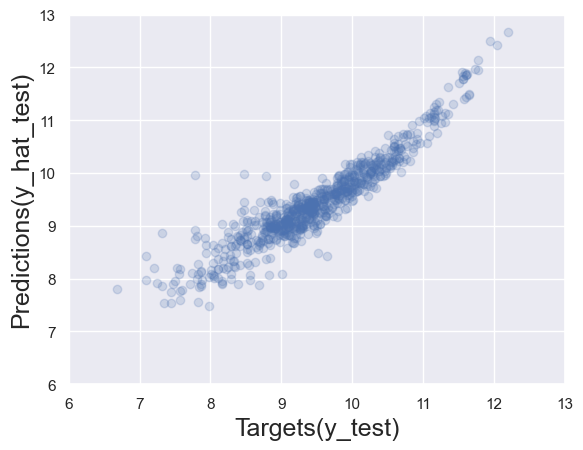

In [37]:
##testing
y_hat_test=reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets(y_test)',size=18)
plt.ylabel('Predictions(y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [38]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,2827.723615
1,7788.694785
2,13000.204088
3,8281.476225
4,14745.558367


In [39]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,2827.723615,NaN
1,7788.694785,7900.0
2,13000.204088,NaN
3,8281.476225,NaN
4,14745.558367,NaN
...,...,...
777,2341.350342,NaN
778,18561.936852,NaN
779,8241.557433,NaN
780,6815.419683,NaN


In [40]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    7.495542
1    9.287301
2    9.609116
3    9.305651
4    9.740910
Name: log_price, dtype: float64

In [41]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,2827.723615,1800.0
1,7788.694785,10800.0
2,13000.204088,14900.0
3,8281.476225,11000.0
4,14745.558367,16999.0
...,...,...
777,2341.350342,1950.0
778,18561.936852,21335.0
779,8241.557433,13500.0
780,6815.419683,6200.0


In [42]:
df_pf['Residual']=df_pf['Target']-df_pf['Prediction']
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,2827.723615,1800.0,-1027.723615,57.095756
1,7788.694785,10800.0,3011.305215,27.882456
2,13000.204088,14900.0,1899.795912,12.750308
3,8281.476225,11000.0,2718.523775,24.713853
4,14745.558367,16999.0,2253.441633,13.256319
...,...,...,...,...
777,2341.350342,1950.0,-391.350342,20.069248
778,18561.936852,21335.0,2773.063148,12.997718
779,8241.557433,13500.0,5258.442567,38.951426
780,6815.419683,6200.0,-615.419683,9.926124


In [43]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,782.000000,782.000000,782.000000,782.000000
mean,21654.177373,20717.216803,-936.960570,26.436818
std,52272.717720,25654.851301,34034.532392,43.700917
min,1762.110578,800.000000,-729950.759153,0.054431
25%,7880.525035,7500.000000,-984.548171,8.692861
50%,11566.792225,12500.000000,659.779060,18.247902
75%,20302.221892,23324.750000,3605.496160,30.748517
max,979949.759153,249999.000000,25592.022301,780.176442


In [44]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x:'%.2f'%x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
40,4152.26,4150.00,-2.26,0.05
287,70037.83,69999.00,-38.83,0.06
131,25577.13,25555.00,-22.13,0.09
334,21973.67,22000.00,26.33,0.12
347,18828.77,18800.00,-28.77,0.15
372,10879.79,10900.00,20.21,0.19
493,72159.87,71999.00,-160.87,0.22
449,8779.80,8800.00,20.20,0.23
695,12432.85,12400.00,-32.85,0.26
602,12735.67,12700.00,-35.67,0.28


In [51]:
from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor()
sgd.fit(x_train,y_train)
y_pred1=sgd.predict(x_test)

In [52]:
y_pred1

array([ 7.93436096,  8.91071917,  9.51587834,  8.99130301,  9.62029757,
        9.07116495, 11.45549865,  8.74142496,  9.96526525,  9.3123149 ,
        8.89163783,  8.56918431, 10.76730737,  9.03688761,  8.87092204,
        9.07549358,  9.15523205,  9.88214774,  9.01294246,  9.31601715,
        9.69585887,  9.24845024,  9.38097999, 11.1348191 ,  8.26374216,
        7.53901782,  8.76600393,  9.8441566 ,  9.89874774,  8.69204235,
        9.43831817,  9.43442723, 10.10056721,  9.85192244, 10.2939529 ,
        9.65835935,  9.19221415, 11.37781811,  9.05435237,  9.41888194,
        8.30392597,  9.01382553,  9.69204788,  9.34087766,  8.69824595,
       10.32445293, 11.85539333,  8.20060275,  9.62354063,  8.13453967,
        8.21536733, 11.58560811,  9.94111673,  9.32000084, 10.29755099,
        9.17468544,  8.91468617,  8.85294585,  9.94120027,  8.84302921,
        9.40427899,  9.56521011,  8.78875994,  9.59972759,  9.3692492 ,
       10.11172734,  9.01253057, 10.24266859,  8.89774463, 10.12

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Abs error', mean_absolute_error(y_test,y_pred1))
print('Mean squared error ',mean_squared_error(y_test,y_pred1))
print('r2_score ',r2_score(y_test,y_pred1))

Mean Abs error 0.23846527021747402
Mean squared error  0.11068166209037339
r2_score  0.8671301137579497


In [54]:
#Lasso Regression (Compare)
from sklearn.linear_model import Lasso
l_model=Lasso()
l_model.fit(x_train,y_train)
y_pred2=l_model.predict(x_test)
y_pred2

array([9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120857,
       9.43120857, 9.43120857, 9.43120857, 9.43120857, 9.43120

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Abs error', mean_absolute_error(y_test,y_pred2))
print('Mean squared error ',mean_squared_error(y_test,y_pred2))
print('r2_score ',r2_score(y_test,y_pred2))

Mean Abs error 0.706931805396711
Mean squared error  0.83713789321975
r2_score  -0.004957953650862157


In [56]:
from sklearn.cluster import KMeans
kmeans=KMeans(2)
kmeans.fit(x_train)

C:\Users\Ivy Sarkar\anaconda4\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [57]:
clusters = kmeans.predict(x_test)
clusters

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [58]:
kmeans.cluster_centers_

array([[-0.3393983 ,  0.2128207 , -0.53920406, -0.3747303 , -0.17340114,
        -0.23103528,  0.56894175, -0.33735901,  0.51502606,  0.26996627,
        -0.03410364, -0.71692243,  0.59769186,  0.73518187, -0.2198405 ,
         0.11897681, -0.46991963, -0.1139306 ],
       [ 0.17062897, -0.10552197,  0.272675  ,  0.19870236,  0.08886268,
         0.13009004, -0.30400955,  0.18580449, -0.28691158, -0.15330943,
         0.02168036,  0.4059334 , -0.3043063 , -0.42556297,  0.12010458,
        -0.05179741,  0.24477873,  0.05686253]])

In [61]:
input_scaled

array([[-0.6051214 ,  1.2269581 , -0.48510652, ..., -0.16123864,
         1.31975543,  0.3195554 ],
       [-0.46306234,  2.78571742,  0.43448616, ..., -0.16123864,
        -0.75771615,  0.3195554 ],
       [-0.25573289,  2.06868813,  2.5802024 , ..., -0.16123864,
        -0.75771615,  0.3195554 ],
       ...,
       [ 4.03291512, -1.55802523,  0.53666312, ..., -0.16123864,
        -0.75771615,  0.3195554 ],
       [-0.51681442, -1.64115906,  1.04754794, ..., -0.16123864,
         1.31975543,  0.3195554 ],
       [-0.24805402, -0.36297641, -0.48510652, ..., -0.16123864,
        -0.75771615,  0.3195554 ]])

In [63]:
wcss=[]
for i in range (1,10):
    kmeans=KMeans(i)
    kmeans.fit(input)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Ivy Sarkar\anaconda4\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ivy Sarkar\anaconda4\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ivy Sarkar\anaconda4\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ivy Sarkar\anaconda4\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

[2650421108528.9443,
 1014029818920.6682,
 526634186156.4666,
 299294689114.5812,
 194515223116.39923,
 139942664289.01578,
 100410986367.2761,
 74891558969.5143,
 59193281039.83918]

Text(0, 0.5, 'WCSS')

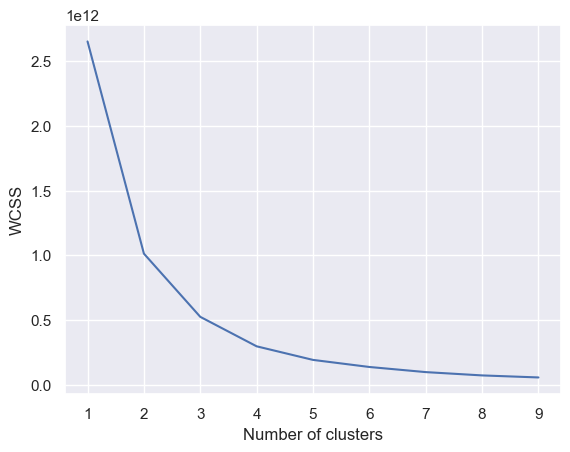

In [64]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')